### Run in collab
<a href="https://colab.research.google.com/github/racousin/data_science_practice/blob/master/website/public/modules/module13/exercise/module13_exercise0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!apt-get install xvfb
!pip install 'swig==4.2.1'
!pip install 'box2d-py==2.3.8'
!pip install 'gymnasium[box2d,atari,accept-rom-license]==0.29.1'
!pip install 'pyvirtualdisplay==3.0'
!pip install 'opencv-python-headless'
!pip install imageio imageio-ffmpeg
!git clone https://github.com/racousin/rl_introduction.git > /dev/null 2>&1

In [ ]:
!pip install 'gymnasium[box2d,atari,accept-rom-license]==0.29.1'

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
import gymnasium as gym
from time import time,sleep
sns.set_style("darkgrid")

# module13_exercise0: Environment_and_Agent

### Introduction to Reinforcement Learning (RL)

In RL, we study the interaction between an **agent** and an **environment**. The agent takes actions to achieve a goal, guided by rewards from the environment. Our aim is to develop agents that can learn optimal behaviors through these interactions.



### Creating an Environment

An environment in RL defines the space in which the agent operates. It returns a new state and a reward for each action taken by the agent.

In [ ]:
class Env:
    def __init__(self):
        self.state = np.random.randint(2)
        self.terminated = False

    def step(self, action):
        if (action % 2 == self.state):
            reward = 1
        else:
            reward = -1
        self.state = np.random.randint(2)
        return self.state, reward, self.terminated, False, {}

    def reset(self):
        self.state = np.random.randint(2)
        self.terminated = False
        return self.state

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Building an Agent
Agents in RL decide which actions to take in an environment. A simple agent might act randomly or follow a predetermined policy.



In [ ]:
class Agent:
    def __init__(self, env):
        pass

    def act(self, state):
        return np.random.randint(2)

### Running an Experiment

To evaluate our agent's performance, we generate trajectories of state-action-reward sequences and compute the total reward.


In [ ]:
def run_experiment(env, agent, nb_steps):
    state = env.reset()
    res = [[state]]
    for _ in range(nb_steps):
        action = agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        res += [[action, reward, state]]

    return res

## Understanding the Environment and Agent

**Question 1:** What is the **state space** in the provided `Env` class?

$$\mathcal{S} = \{0, 1\}$$


**Question 2:** What is the **action space** in the provided `Env`/`Agent` class?

$$\mathcal{A} = \{0, 1\}$$

**Question 3:** What is the **Transition model** in the provided `Env` class? Is it a bandit environement?

$$\mathbb{P}(S_{t+1} = s' | S_t = s, A_t = a) = \frac{1}{2}$$
$$\text{(indépendant de l'état ou de l'action au temps précédent)}$$

$$\text{On est pas dans un bandit parce qu'on a un espace d'état.}$$


**Question 4:** What is the **Policy** in the provided `Agent` class?

$$\pi = \mathcal{B}\left(\frac{1}{2}\right)$$
$$\text{(action indépendante de l'état actuel)}$$


**Question 5:** What is the **Reward Function** in the provided `Env` class?

$$\text{Si l'action est de même parité que l'état d'origine alors } R=1 \text{, sinon } R=-1.$$


**Question 6:** What object **run_experiment** is returning?

$$\text{L'objet retourné est une liste des (a, r, s) à chaque étape.}$$



**Exercise 1:** Instantiating the class `Agent` and `Env` to `run_experiment` on **100 steps**.



**Exercise 2:** Compute the **cumulative reward** and **discouted cumultative reward**, also known as the return value. You can return more information from `run_experiment` to help.


**Question 7:** In this `MDP`, what is the **Expected Return** when following the random policy of the `Agent`?

$$\text{moyenne d'une Bernoulli : } \frac{1}{2}$$


**Question 8:** what would be the **best policy** function for the `Env` environment?

$$\text{Tirer comme action la même parité que l'état, ie prendre comme action l'état courant.}$$


**Exercise 3:** Implement the best policy function and use it to run the best agent. Compare its performance to the random agent.



In [ ]:
# Instantiation
env = Env()
agent = Agent(env)
run_experiment(env, agent, 100)

[[1],
 [0, -1, 1],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 1],
 [0, -1, 1],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 1],
 [0, -1, 0],
 [0, 1, 1],
 [0, -1, 1],
 [1, 1, 1],
 [0, -1, 0],
 [0, 1, 0],
 [0, 1, 1],
 [0, -1, 0],
 [0, 1, 0],
 [0, 1, 1],
 [1, 1, 0],
 [0, 1, 1],
 [0, -1, 0],
 [0, 1, 0],
 [1, -1, 1],
 [1, 1, 0],
 [1, -1, 1],
 [0, -1, 0],
 [1, -1, 0],
 [1, -1, 1],
 [1, 1, 0],
 [0, 1, 1],
 [0, -1, 1],
 [1, 1, 1],
 [0, -1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 0],
 [1, -1, 1],
 [0, -1, 1],
 [1, 1, 0],
 [0, 1, 0],
 [1, -1, 1],
 [1, 1, 0],
 [1, -1, 1],
 [0, -1, 1],
 [0, -1, 1],
 [0, -1, 0],
 [1, -1, 1],
 [1, 1, 1],
 [0, -1, 0],
 [1, -1, 0],
 [0, 1, 1],
 [1, 1, 0],
 [1, -1, 1],
 [0, -1, 1],
 [1, 1, 1],
 [1, 1, 0],
 [1, -1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [0, -1, 1],
 [0, -1, 0],
 [0, 1, 1],
 [1, 1, 1],
 [1, 1, 0],
 [1, -1, 0],
 [1, -1, 1],
 [1, 1, 0],
 [1, -1, 0],
 [0, 1, 0],
 [1, -1, 1],
 [1, 1, 1],
 [0, -1, 1],
 [0, -1, 1],
 [1, 1, 0],
 [0, 1, 1],
 [0, -1, 0],
 [0, 1, 0],
 [1, -1, 0],
 [1, -1, 1],
 [0, -1,


**Exercise 2:** Compute the **cumulative reward** and **discouted cumultative reward** also known as the return value for each step of the trajectory. Provide the **cumulative reward** and **discouted (0.8) cumultative reward** at step 42.  You can use the `rewards` return by `run_experiment` bellow to help.

In [ ]:
def run_experiment(env, agent, nb_steps):
    state = env.reset()
    res = [state]
    rewards = []
    for _ in range(nb_steps):
        action = agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        res += [action, reward, state]
        rewards.append(reward)

    return res, rewards

Text(0.5, 1.0, 'Best agent vs Random agent / sum reward')

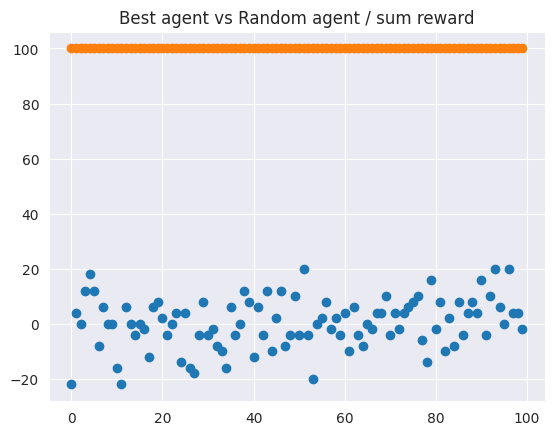

In [ ]:
def best_policy(state):
    return state

class Best_Agent:
    def __init__(self, env):
        pass

    def act(self, state):
        return best_policy(state)


# Instantiation
env = Env()
my_random_agent = Agent(env)
my_best_agent = Best_Agent(env)

nb_experiment = 100
sum_random_agent_rewards = []
sum_best_agent_rewards = []
for exp in range(nb_experiment):
    _, random_agent_rewards = run_experiment(env, my_random_agent, nb_steps=100)
    _, best_agent_rewards = run_experiment(env, my_best_agent, nb_steps=100)
    sum_random_agent_rewards.append(sum(random_agent_rewards))
    sum_best_agent_rewards. append(sum(best_agent_rewards))

plt.plot(sum_random_agent_rewards, 'o')
plt.plot(sum_best_agent_rewards,'o')
plt.title('Best agent vs Random agent / sum reward')

In [ ]:
def compute_cumulative_reward(rewards, discout_factor=1):
    T = len(rewards)
    dfs = discout_factor ** np.linspace(1,T,T)
    cumulative_rewards = np.cumsum(rewards * dfs)
    return cumulative_rewards

In [ ]:
_, rewards = run_experiment(env, agent, nb_steps=100)
print(compute_cumulative_reward(rewards)[42], compute_cumulative_reward(rewards, 0.8)[42])

1.0 0.665235172709833


## Start with Gymnasium's Environment


In this section, we delve into the diverse range of environments offered by Gymnasium, which is recognized as the gold standard for defining reinforcement learning environments. Our exploration will provide insights into the dynamics of different systems and how they can be modeled and understood within the framework of reinforcement learning.

Execute the code below to initiate and observe experiments across various environments: **'FrozenLake-v1'**, **'CartPole-v1'**, **'LunarLanderContinuous-v2'**, and **'PongNoFrameskip-v4'**. While these experiments run, visit the Gymnasium documentation to acquaint yourself with the detailed characteristics and nuances of each environment.

In [ ]:
from rl_introduction.rl_introduction.render_colab import exp_render
# Environments to run experiments on
env_render_configs = [{"name":'FrozenLake-v1', "fps":2, "nb_step":30},
 {"name":'CartPole-v1', "fps":17, "nb_step":120},
  {"name":'LunarLanderContinuous-v2', "fps":30, "nb_step":300},
   {"name":'PongNoFrameskip-v4', "fps":40, "nb_step":800}]
for env_render_config in env_render_configs:
  exp_render(env_render_config)

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

###Questions on Environment Dynamics
**Question 1:** Actions and States
For each environment (FrozenLake-v1, CartPole-v1, LunarLanderContinuous-v2, PongNoFrameskip-v4), identify the action space and state space. Specify whether each is discrete or continuous, and provide their sizes.

FrozenLake-v1:

Action Space: $\mathcal{A} = \{0, 1, 2, 3\}$ ;
State Space: $\mathcal{S} = [16]$


CartPole-v1:

Action Space: $\mathcal{A} = \{0, 1\}$ ;
State Space: $\mathcal{S} = [\pm 4.8] \times \mathbb{R} \times [\pm 24°] \times \mathbb{R}$


LunarLanderContinuous-v2:

Action Space: $\mathcal{A} = \{0, 1, 2, 3\}$ ;
State Space: 8 dimensions


PongNoFrameskip-v4:

Action Space: $\mathcal{A} = [6]$ ;
State Space: 3 dimensions

**Question 2:** Transition Models
For each environment, is the transition model deterministic or probabilistic?

FrozenLake-v1: probabilistic ?

CartPole-v1: deterministic ?

LunarLanderContinuous-v2: deterministic ?

PongNoFrameskip-v4: deterministic ?

**Question 3:** Reward Functions
Define the reward function for each environment.

FrozenLake-v1:

CartPole-v1:

LunarLanderContinuous-v2:

PongNoFrameskip-v4:

### Exercises on Agent Performance

**Exercise 1:** Running an Experiment

Instantiate a random agent along with the Gymnasium environment, and run the experiment until completion (terminated=True or truncated = True) for the following four environments: 'FrozenLake-v1', 'CartPole-v1', 'LunarLanderContinuous-v2', and 'PongNoFrameskip-v4'. Compute cumulative reward and number of step for each experiment.



In [ ]:
import gymnasium as gym

class RandomAgent():
    def __init__(self, env):
        self.env = env

    def act(self, state):
        if isinstance(self.env.action_space, gym.spaces.Discrete):
            return self.env.action_space.sample()
        elif isinstance(self.env.action_space, gym.spaces.Box):
            return np.random.uniform(self.env.action_space.low, self.env.action_space.high, self.env.action_space.shape)

def run_experiment(env_name):
    env = gym.make(env_name)
    agent = RandomAgent(env)
    state = env.reset()
    rewards = []

    nb_steps = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action = agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        rewards.append(reward)
        nb_steps+=1

    return rewards, nb_steps

env_names = ['FrozenLake-v1', 'CartPole-v1', 'LunarLanderContinuous-v2', 'PongNoFrameskip-v4']
for env_name in env_names:
    rewards, nb_step = run_experiment(env_name)
    print(f"{env_name} cumulative reward: {sum(rewards)}, number steps: {nb_step}")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FrozenLake-v1 cumulative reward: 0.0, number steps: 2
CartPole-v1 cumulative reward: 27.0, number steps: 27
LunarLanderContinuous-v2 cumulative reward: -160.29626829261645, number steps: 82
PongNoFrameskip-v4 cumulative reward: -21.0, number steps: 3536


**Exercise 2:** Running Experiments and compute cumulative reward
Conduct 20 experiments for each environment using a random agent. For each environement display the cumulative reward with a discount factor of 0.95.

In [ ]:
nb_experiments = 20
discount_factor = 0.95

for env_name in env_names:
    cumulative_rewards = []
    for _ in range(nb_experiments):
        rewards, _ = run_experiment(env_name)
        compute_cumulative_reward(rewards, discount_factor)
        cumulative_rewards.append(sum(compute_cumulative_reward(rewards, discount_factor)))
    print(f"{env_name} mean cumulative reward: {np.mean(cumulative_rewards)}")

FrozenLake-v1 mean cumulative reward: 0.01986071592291091
CartPole-v1 mean cumulative reward: 130.4766213339084
LunarLanderContinuous-v2 mean cumulative reward: -1329.7083171459976
PongNoFrameskip-v4 mean cumulative reward: -0.005952214714408959
